# 26.3 - Evaluating Clusters

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

## Part 1 - Iris dataset

In [56]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [57]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.45994823920518635


In [58]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5817500491982808


How do you explain that the silhouette score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes?

Intuitively, the scatter plot looks more similar to a 2-cluster dataset than 3. So it makes sense that a clustering algorithm would perform best with 2 clusters. Mathematically, b_i with 3 clusters is going to decrease, as will a_i (most likely), and thus, max(a_i, b_i). If b_i decreases more than a_i, the numerator will decrease. max(a_i, b_i) will usually equal b_i.
<br>
<br>
<br>
If, in going from 2 clusters to 3, you have:

a small decrease in a_i, mean distance to points in its own cluster, and,<br>
a large decrease in b_i, mean distance to points in the nearest cluster,

then the silhouette score will decrease.

<br>
<br>
However, if you have:

a large decrease in a_i, and a small decrease in b_i, then you will have an increase.

<br>
<br>

Said non-technically, if other clusters get closer to an indivudual point while that point doesn't get closer to points in its own cluster, the score will reflect a worse fit.

## Part 2 - Heart Disease Data Set

In [59]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [60]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2, y_half1, y_half2 = train_test_split(
    X_std,
    X_pca,
    y,
    test_size=0.5,
    random_state=13579)

## Question 1

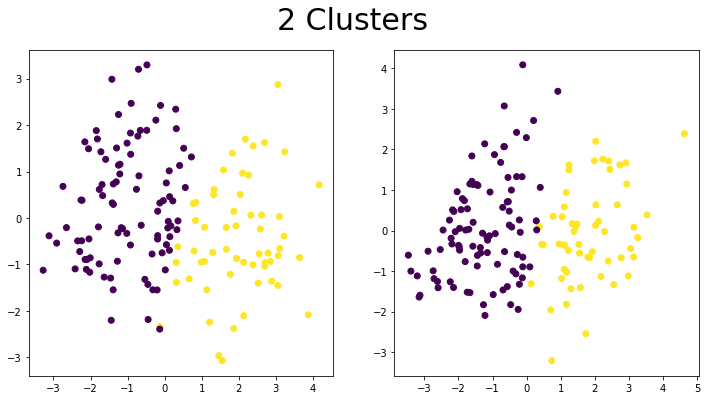

In [61]:
km = KMeans(n_clusters=2, random_state=123).fit(X_half1)

labels1 = km.predict(X_half1)
labels2 = km.predict(X_half2)

plt.figure(figsize=(12,6))

plt.suptitle('2 Clusters', size=30)

plt.subplot(1,2,1)
plt.scatter([x[0] for x in X_pcahalf1], [x[1] for x in X_pcahalf1], c=labels1)

plt.subplot(1,2,2)
plt.scatter([x[0] for x in X_pcahalf2], [x[1] for x in X_pcahalf2], c=labels2)

plt.show()

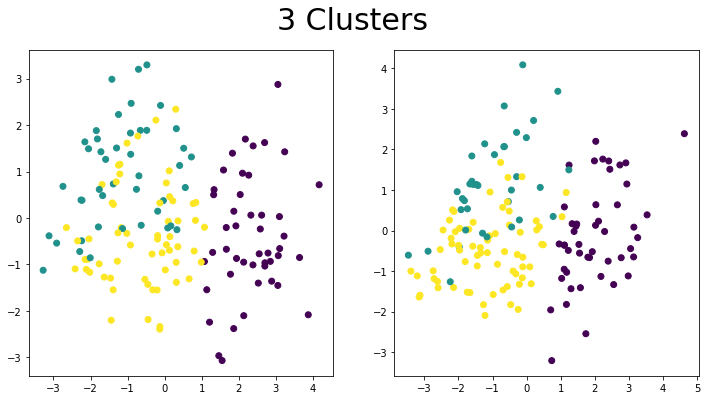

In [62]:
km = KMeans(n_clusters=3, random_state=123).fit(X_half1)

labels1 = km.predict(X_half1)
labels2 = km.predict(X_half2)

plt.figure(figsize=(12,6))

plt.suptitle('3 Clusters', size=30)

plt.subplot(1,2,1)
plt.scatter([x[0] for x in X_pcahalf1], [x[1] for x in X_pcahalf1], c=labels1)

plt.subplot(1,2,2)
plt.scatter([x[0] for x in X_pcahalf2], [x[1] for x in X_pcahalf2], c=labels2)

plt.show()

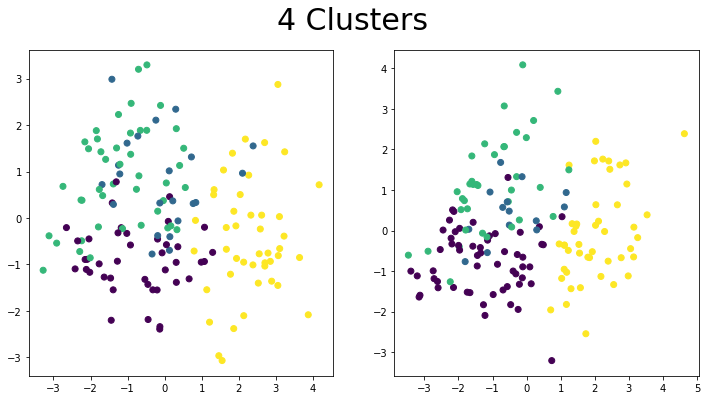

In [63]:
km = KMeans(n_clusters=4, random_state=123).fit(X_half1)

labels1 = km.predict(X_half1)
labels2 = km.predict(X_half2)

plt.figure(figsize=(12,6))

plt.suptitle('4 Clusters', size=30)

plt.subplot(1,2,1)
plt.scatter([x[0] for x in X_pcahalf1], [x[1] for x in X_pcahalf1], c=labels1)

plt.subplot(1,2,2)
plt.scatter([x[0] for x in X_pcahalf2], [x[1] for x in X_pcahalf2], c=labels2)

plt.show()

None of the clustering solutions are particularly compelling, but the first, separated into 2 clusers, looks the "cleanest."

## Question 2

In [64]:
km2 = KMeans(n_clusters=2, random_state=123).fit_predict(X)
km3 = KMeans(n_clusters=3, random_state=123).fit_predict(X)
km4 = KMeans(n_clusters=4, random_state=123).fit_predict(X)

print('ARI, 2 clusters: {}'.format(metrics.adjusted_rand_score(y, km2)))
print('ARI, 3 clusters: {}'.format(metrics.adjusted_rand_score(y, km3)))
print('ARI, 4 clusters: {}'.format(metrics.adjusted_rand_score(y, km4)))

ARI, 2 clusters: 0.020593537591174656
ARI, 3 clusters: 0.008957754384237345
ARI, 4 clusters: 0.014504052592432917


2 clusters performs the best according to ARI

## Question 3

In [65]:
print('Silhouette, 2 clusters: {}'.format(metrics.silhouette_score(X, km2, metric='euclidean')))
print('Silhouette, 3 clusters: {}'.format(metrics.silhouette_score(X, km3, metric='euclidean')))
print('Silhouette, 4 clusters: {}'.format(metrics.silhouette_score(X, km4, metric='euclidean')))

Silhouette, 2 clusters: 0.3888908389416227
Silhouette, 3 clusters: 0.2814816823419264
Silhouette, 4 clusters: 0.2798165983362194


2 clusters performs the best according to ARI